In [2]:
import h5py as h5
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
a = np.logspace(-0.5, 2.0, 50)
ecc = np.linspace(0, 1, 51)
inc = np.linspace(0, 180, 52)

grid_shape = (len(a), len(ecc), len(inc))

In [4]:
densities = np.load("small_densities.npy")

In [5]:
normalised_density = densities / densities.sum()
cumulative_density = normalised_density.cumsum()

In [12]:
random_values = np.random.rand(int(1e6))

In [13]:
pixels = np.searchsorted(cumulative_density, random_values)

In [14]:
a_ind, e_ind, i_ind = np.unravel_index(pixels, shape=grid_shape)

In [15]:
# clunky fix TODO: check with Mario
a_ind[a_ind == 49] = 48
e_ind[e_ind == 50] = 49
i_ind[i_ind == 51] = 50

In [16]:
da = np.log10(a[1]) - np.log10(a[0])
random_loga = np.random.rand(len(a_ind)) * da + np.log10(a[a_ind])

de = ecc[1] - ecc[0]
random_e = np.random.rand(len(e_ind)) * de + ecc[e_ind]

di = inc[1] - inc[0]
random_i = np.random.rand(len(i_ind)) * di + inc[i_ind]

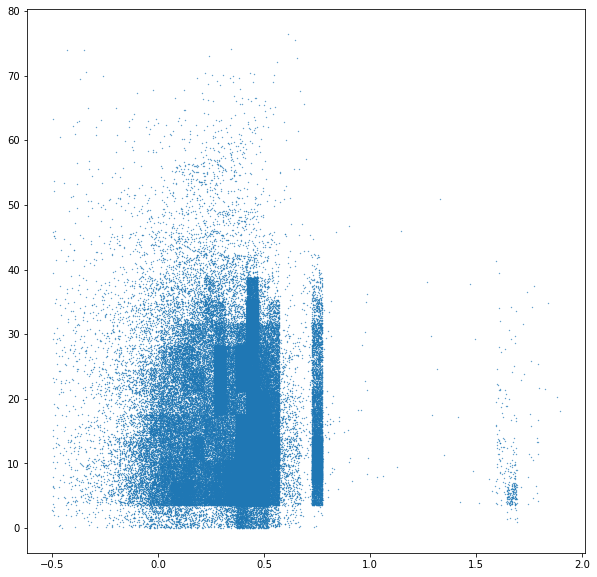

In [20]:
plt.figure(figsize=(10, 10))
plt.scatter(random_loga, random_i, s=0.1)
plt.show()